In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import analisys_tools
import os

In [16]:
diabetes_data = pd.read_csv(os.getcwd() + '/diabetes_data.csv')
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female
...,...,...,...,...,...,...,...,...,...,...
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female


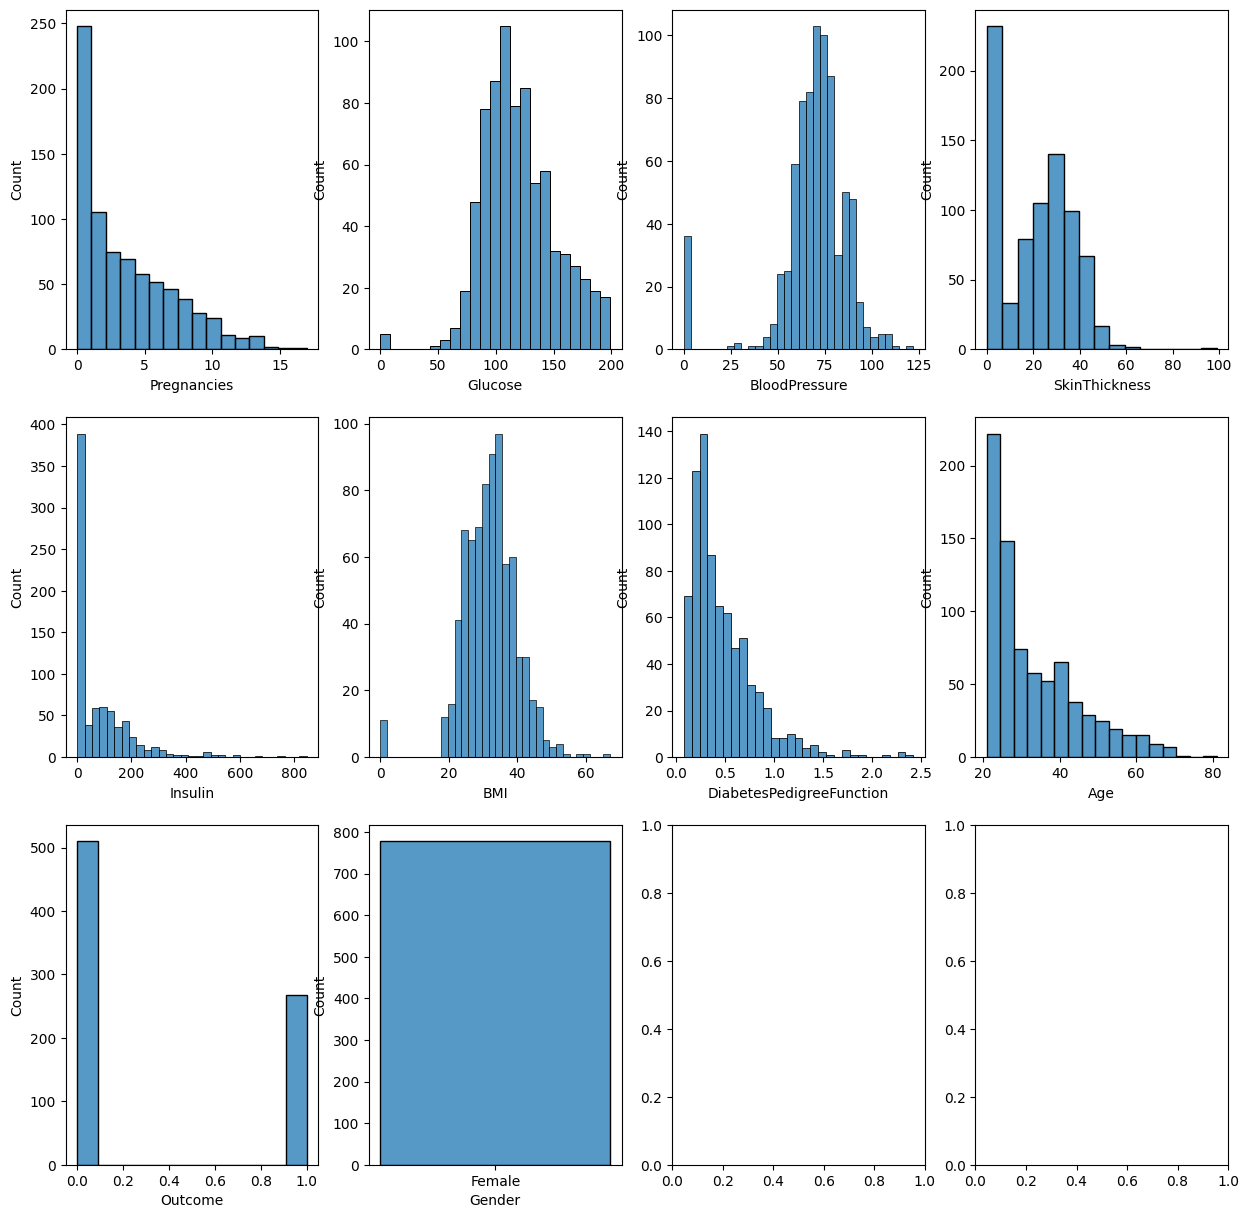

In [17]:
analisys_tools.data_distr_mtx(
    data=diabetes_data,
    labels=diabetes_data.columns,
    rows=3,
    cols=4,
    fig_size=(15, 15)
)

In [18]:
low_info_cols = analisys_tools.low_info_labels(
    data=diabetes_data,
    labels=diabetes_data.columns,
    thrash=0.95
)
print(low_info_cols)

{'Gender': '100.0% equal values'}


In [19]:
diabetes = diabetes_data.copy()

In [20]:
diabetes = diabetes.drop('Gender', axis=1)

In [21]:
low_info_cols = analisys_tools.low_info_labels(
    data=diabetes,
    labels=diabetes.columns,
    thrash=0.95
)
print(low_info_cols)

{}


In [22]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
wrong_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in wrong_zeros:
    diabetes[col] = diabetes[col].replace(0, np.nan)

In [24]:
diabetes['Insulin'].isna().sum()

380

{'Glucose': 0.64,
 'BloodPressure': 4.63,
 'SkinThickness': 29.82,
 'Insulin': 48.84,
 'BMI': 1.41}

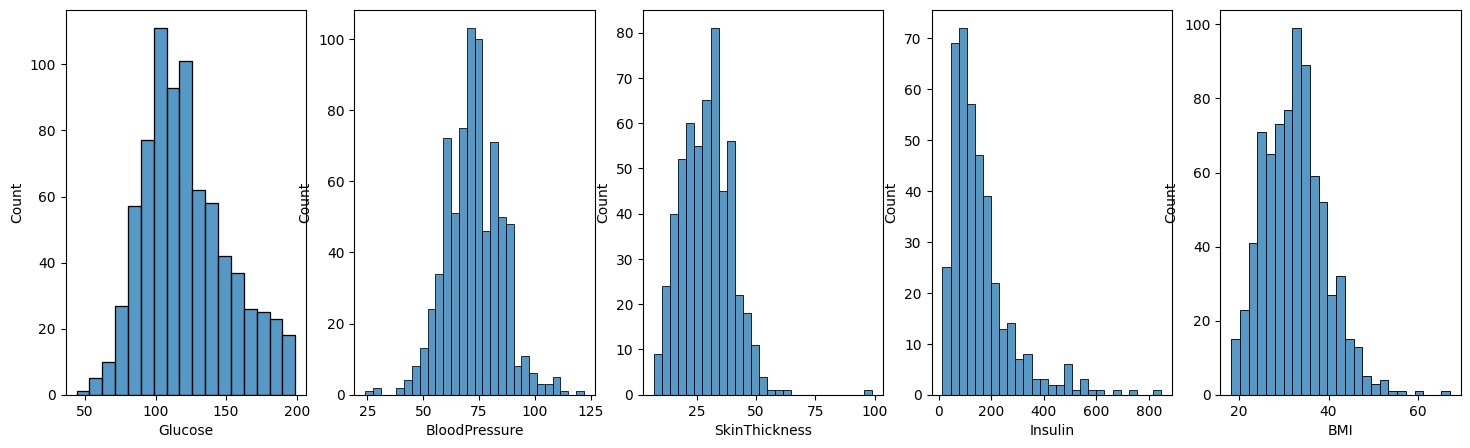

In [25]:
cols = diabetes.isna().sum()
nan_cols = cols[cols > 0].index
nan_percents = {nan_col: round(diabetes[nan_col].isna().sum() / diabetes[nan_col].shape[0] * 100, 2) for nan_col in nan_cols}
display(nan_percents)
analisys_tools.data_distr_mtx(
    data=diabetes,
    labels=nan_cols,
    rows=1,
    cols=5,
    fig_size=(18, 5)
)

In [26]:
diabetes = diabetes.drop(['Insulin'], axis=1)

In [27]:
display(diabetes.shape[0])
diabetes = diabetes.dropna(axis=0, thresh=diabetes.shape[1]-2)
diabetes.shape[0]

778

771

In [28]:
diabetes = diabetes.fillna(diabetes.mean())

In [29]:
outliers, clean_data = analisys_tools.outliers_iqr(diabetes, 'SkinThickness')
outliers.shape[0]

87

In [30]:
outliers, clean_data = analisys_tools.outliers_three_sigma(diabetes, 'SkinThickness')
outliers.shape[0]

233

In [31]:
outliers, clean_data = analisys_tools.outliers_iqr(diabetes, 'DiabetesPedigreeFunction')
outliers.shape[0]

29

In [32]:
outliers, clean_data = analisys_tools.outliers_iqr(diabetes, 'DiabetesPedigreeFunction', log_scale=True)
outliers.shape[0]

13